In [1]:
import pandas
import numpy as np

%matplotlib inline

In [2]:
raw_tea_df = pandas.read_csv("./scraper/tea.csv")

In [3]:
tea_df = raw_tea_df.drop(['url'], axis=1)
tea_df = tea_df.set_index('id')
tea_df.head()

,name,brand,reviewCount,ratingValue,teaType,ingredients,flavors,soldIn,caffeine,certification,wantIt,ownIt,imageUrl
id,,,,,,,,,,,,,
65303,2015 Last Thoughts,White 2 Tea,16,89,Pu-erh Tea,Not available,"Floral, Rainforest, Honeysuckle, Orchids, Pepp...",Not available,Not available,Not available,51,20,https://media.steepster.com/api/file/kL8dCqJrT...
43095,Golden Orchid,Whispering Pines Tea Company,155,89,Black Tea,"Fujian Xiao Zhong, Vanilla Bean, Yunnan Dian Hong","Dark Chocolate, Chocolate, Dates, Malt, Orchid...",Loose Leaf,High,Not available,315,236,https://media.steepster.com/api/file/exT0OHWdT...
78801,The Silver Moonlight,Chai & Mighty,6,89,White Tea,White Tea Leaves,"Honey, Lemon, Nuts, Flowers, Lemongrass",Loose Leaf,Low,"Fair Trade, Organic, Vegan",3,4,https://media.steepster.com/api/file/cmNMAbwSn...
48058,Cocoa Amore,Whispering Pines Tea Company,85,89,Black Tea,"Chinese Black Tea, Tahitian Vanilla","Cocoa, Dark Chocolate, Malt, Vanilla, Apple, A...",Loose Leaf,High,Not available,227,156,https://media.steepster.com/api/file/0vAf5X4Si...
32444,Laoshan Bilochun Green,Verdant Tea,19,89,Green Tea,Not available,"Sweet, Mineral, Nutty, Roasted, Salty, Butter,...",Not available,Not available,Not available,11,21,https://media.steepster.com/api/file/F0AJQO5DT...


**Fix ratingValue**

In [4]:
tea_df[tea_df.ratingValue == "--"] = np.NaN
tea_df.ratingValue = tea_df.ratingValue.astype(float)

**Fix flavors**

In [5]:
tea_df[tea_df.flavors == "Not available"] = np.NaN

**Remove missing values**

In [6]:
print("Number of missing values:")
tea_df.isnull().sum()

Number of missing values:


name             52574
brand            52574
reviewCount      52574
ratingValue      52574
teaType          52574
ingredients      52574
flavors          52574
soldIn           52574
caffeine         52574
certification    52574
wantIt           52574
ownIt            52574
imageUrl         52574
dtype: int64

In [7]:
tea_df = tea_df.dropna(axis=0, how='all')
print("Number of missing values:")
tea_df.isnull().sum()

Number of missing values:


name             0
brand            0
reviewCount      0
ratingValue      0
teaType          0
ingredients      0
flavors          0
soldIn           0
caffeine         0
certification    0
wantIt           0
ownIt            0
imageUrl         0
dtype: int64

**Describe data**

In [8]:
tea_df.describe()

,reviewCount,ratingValue,wantIt,ownIt
count,15641.000000,15641.000000,15641.000000,15641.000000
mean,8.716386,77.140272,3.252222,9.334697
std,22.517419,5.680778,11.439880,31.174744
min,1.000000,39.000000,0.000000,0.000000
25%,1.000000,75.000000,0.000000,1.000000
50%,2.000000,78.000000,0.000000,2.000000
75%,7.000000,81.000000,2.000000,6.000000
max,671.000000,89.000000,315.000000,979.000000


In [9]:
tea_df.describe(include=[np.object])

,name,brand,teaType,ingredients,flavors,soldIn,caffeine,certification,imageUrl
count,15641,15641,15641,15641,15641,15641,15641,15641,15641
unique,13822,2227,231,3789,12676,16,6,16,13517
top,Earl Grey,Yunnan Sourcing,Black Tea,Not available,Flowers,Not available,Not available,Not available,https://media.steepster.com/api/file/anN07UThR...
freq,53,610,4042,8422,76,6637,10768,13559,2125


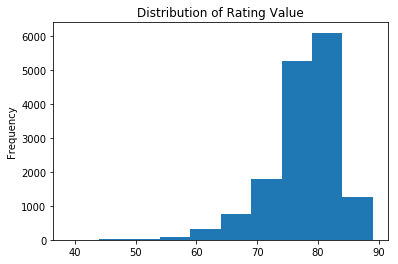

In [10]:
tea_df.ratingValue.plot('hist', title="Distribution of Rating Value")

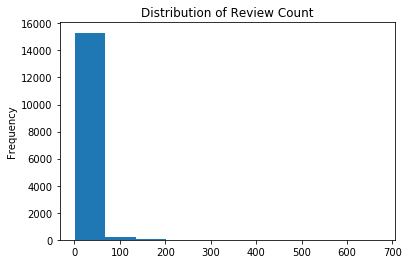

In [11]:
tea_df.reviewCount.plot('hist', title="Distribution of Review Count")

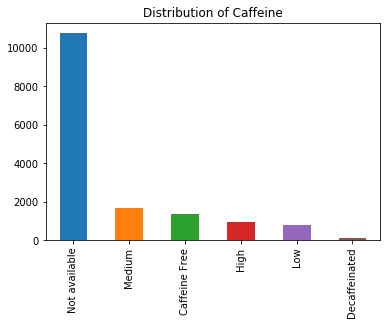

In [12]:
tea_df.caffeine.value_counts().plot('bar', title="Distribution of Caffeine")

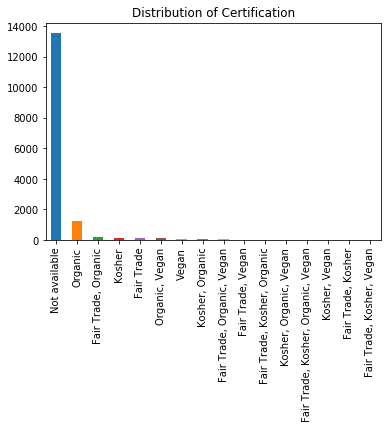

In [13]:
tea_df.certification.value_counts().plot('bar',  title="Distribution of Certification")

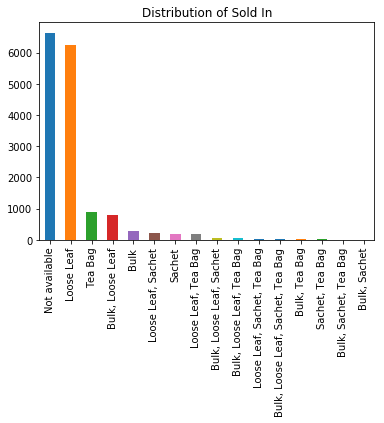

In [14]:
tea_df.soldIn.value_counts().plot('bar', title="Distribution of Sold In")

**Usable data:**

In [15]:
tea_df.to_csv("./scraper/clean_data.csv")